# Inmersion de datos Alura Latam 2024

## CLASE 1: Preprocesamiento y exploracion de datos

### Preprocesamiento de los datos
Realizar limpieza de datos, manejar valores faltantes, codificacion de variables categoricas y normalizacion/escalado de datos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
pd.set_option("display.max_columns",None)
global df_banco, resultados

In [ ]:
df_banco = pd.read_csv("/content/german_credit.csv")
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
df_banco.shape

(1000, 21)

In [ ]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object')

In [ ]:
columnas = list(df_banco.select_dtypes(include=["object"]).columns)
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print("\n")

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [ ]:
# dic = {"yes":1, "no":0}
# df_banco["foreign_worker"] = df_banco["foreign_worker"].map(dic)
# df_banco["foreign_worker"]

In [ ]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [ ]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
511,0,4,36,3,2,4686,5,3,2,3,1,2,4,32,3,3,1,4,1,1,1
723,0,2,9,3,5,790,3,3,4,2,1,3,1,66,3,2,1,2,1,0,1
509,0,4,39,3,2,8588,4,1,4,3,1,2,3,45,3,2,1,4,1,1,1


### Exploracion de los datos
Analizar y comprender el conjunto de datos proporcionado, identificar variables claves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las caracteristicas relevantes

In [ ]:
variables_discretas = ["personal_status_sex","age","duration_in_month","credit_amount","default"]

In [ ]:
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [ ]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [ ]:
feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


In [ ]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


In [ ]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

<ipython-input-18-4885b7f847a5>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i[0]+1)


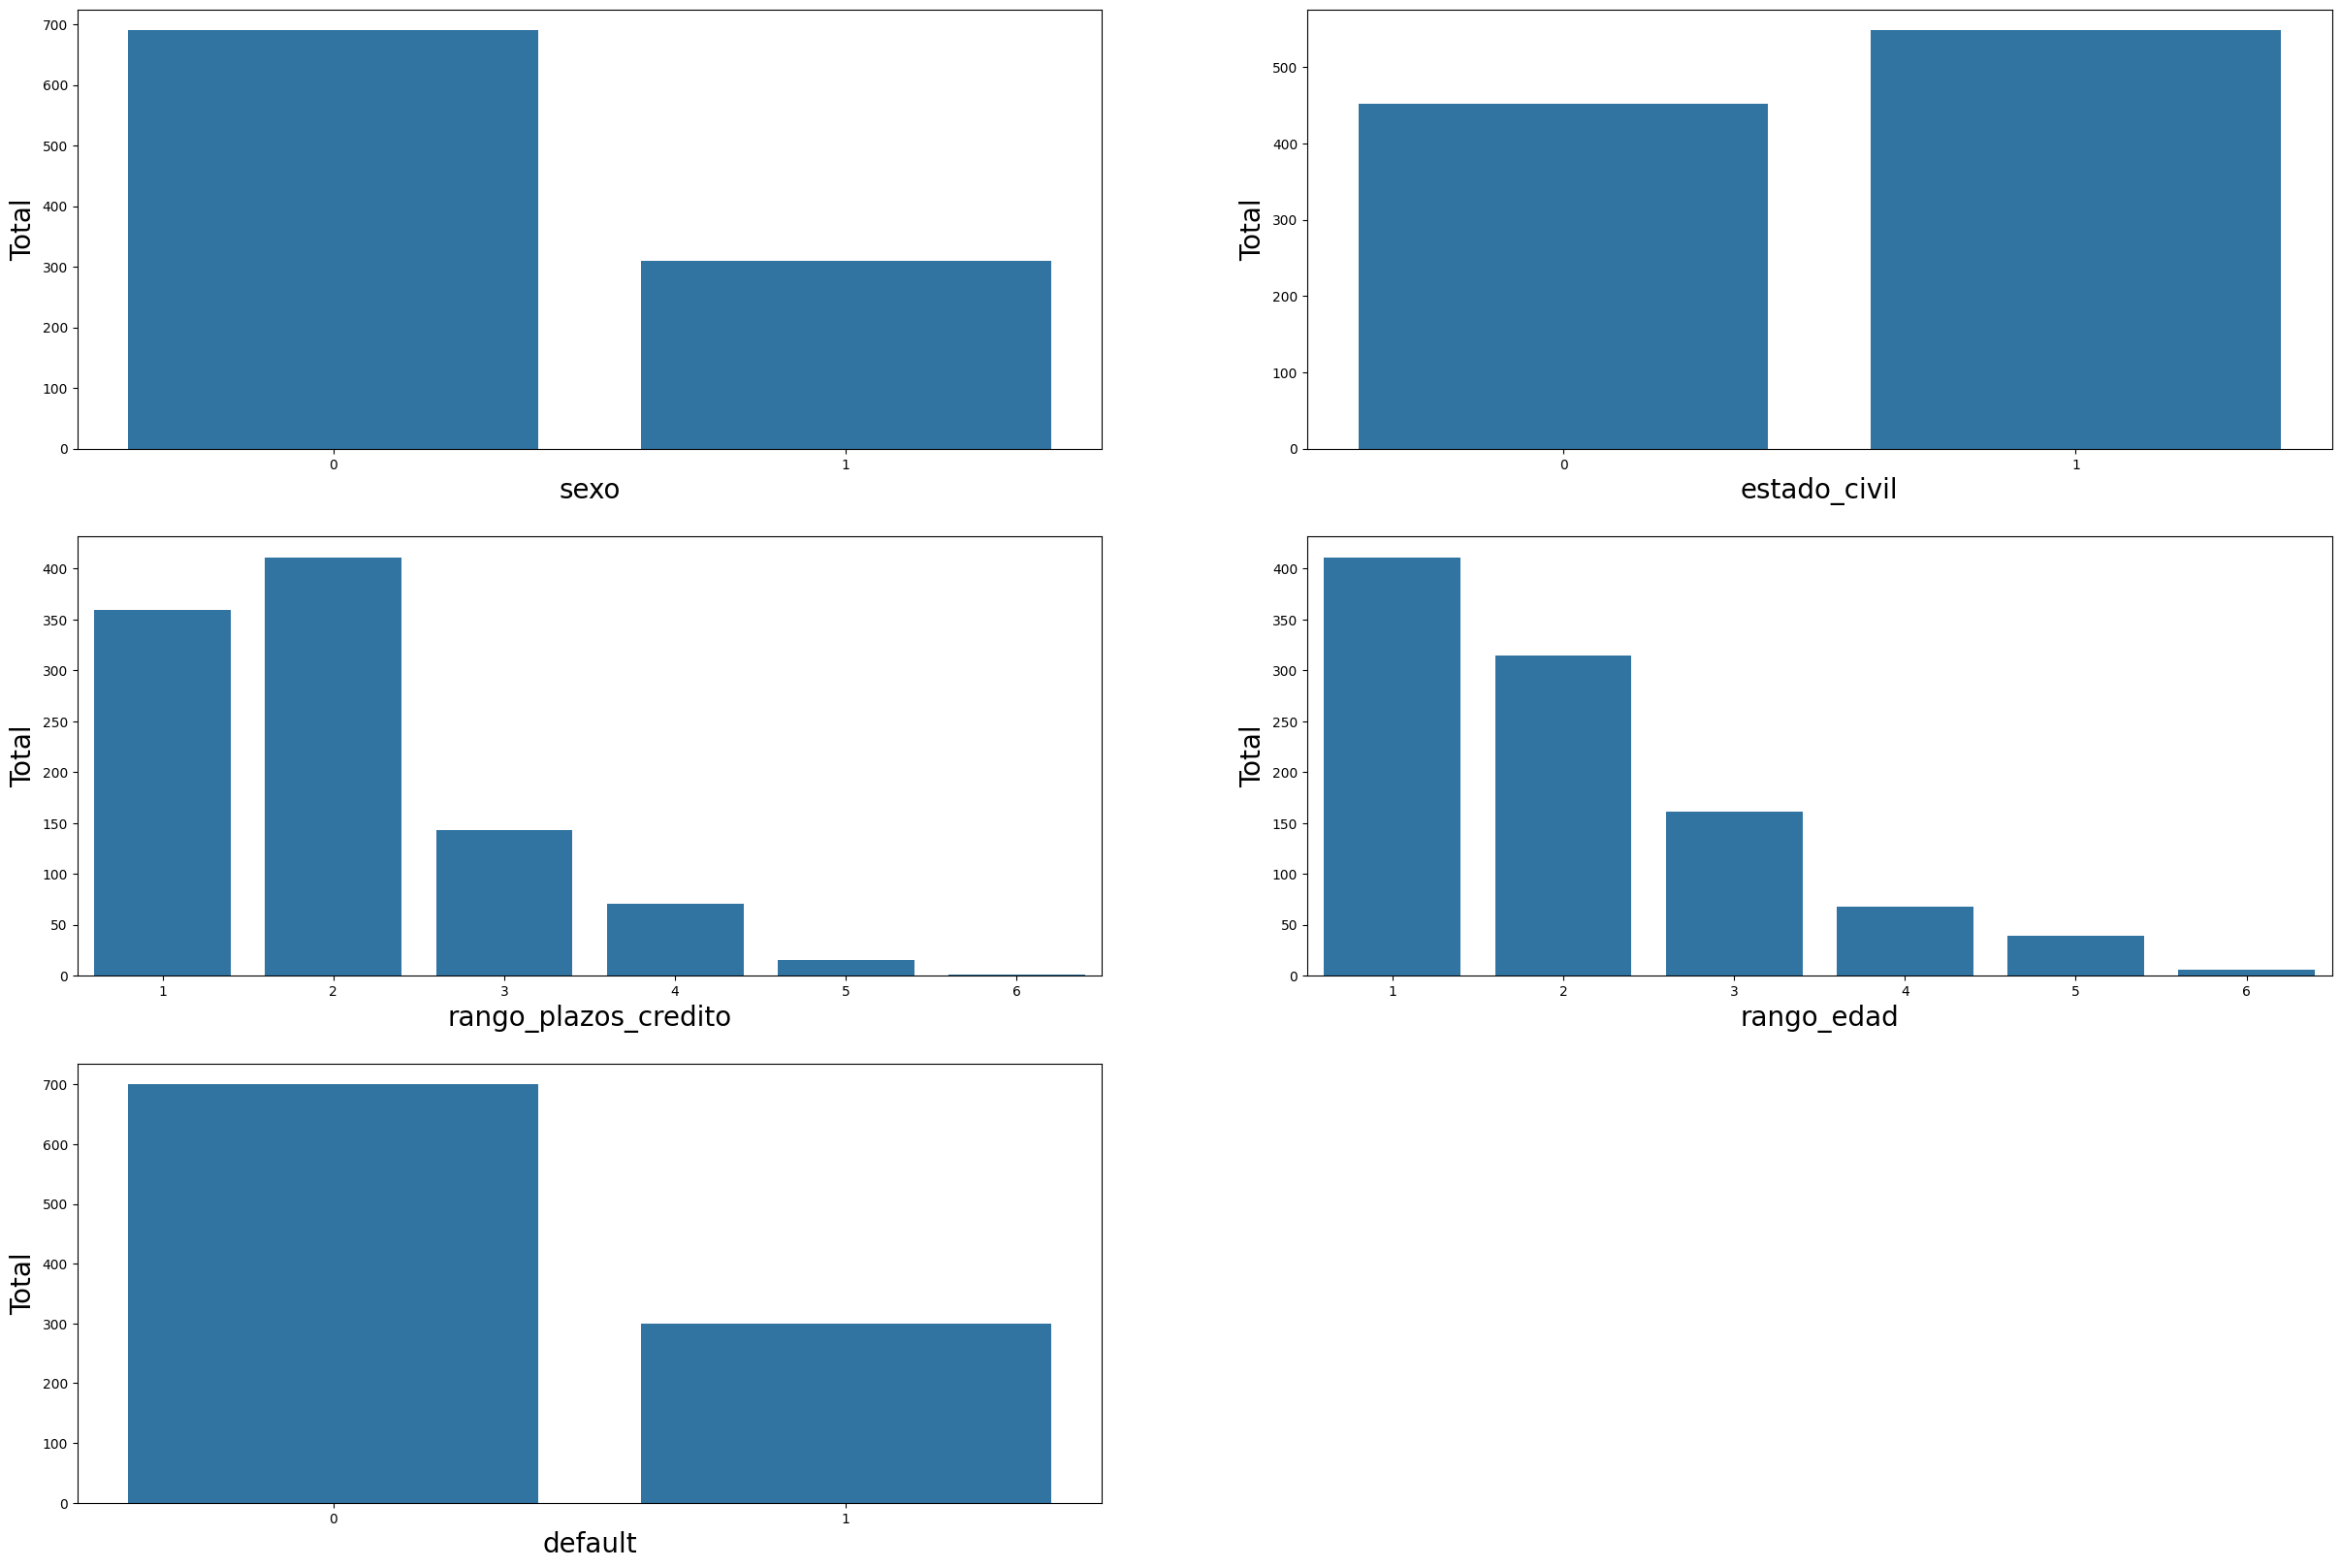

In [ ]:
analisis_exploratorio()

- Desafio: Analizar los datos de las distribuciones e identificar si hay algun valor o registros que no se deben considerar para el modelo
- Investigar que es y como crear un mapa de calor para analizar la correlacion de las variables
- Crear una conclusion para cada uno de los graficos del histograma. Mirar los datos y extraer conclusiones

Rspuesta 1: Considero que el sexo no es un items significativo para el tema de predecir si el cliente paga o no paga el credito hay opciones mas significativas como si esta activo en el trabajo, numero de personas a cargo, o el historial crediticio que tienen mayor relacion al tema de cumplimiento de los creditos.

Respuesta 2: Un mapa de calor es una representación gráfica en la que los valores de una matriz se muestran mediante colores. Se utiliza para visualizar la distribución e intensidad de una variable en dos dimensiones. En el mapa de calor, los colores representan los valores de la matriz, con colores cálidos indicando valores altos y colores fríos indicando valores bajos. Se utiliza para identificar patrones, tendencias y variaciones en grandes conjuntos de datos, siendo útil en campos como análisis financiero, ciencia de datos, biología, etc. Principalmente, ayuda a visualizar la relación entre dos variables en un conjunto de datos bidimensional.

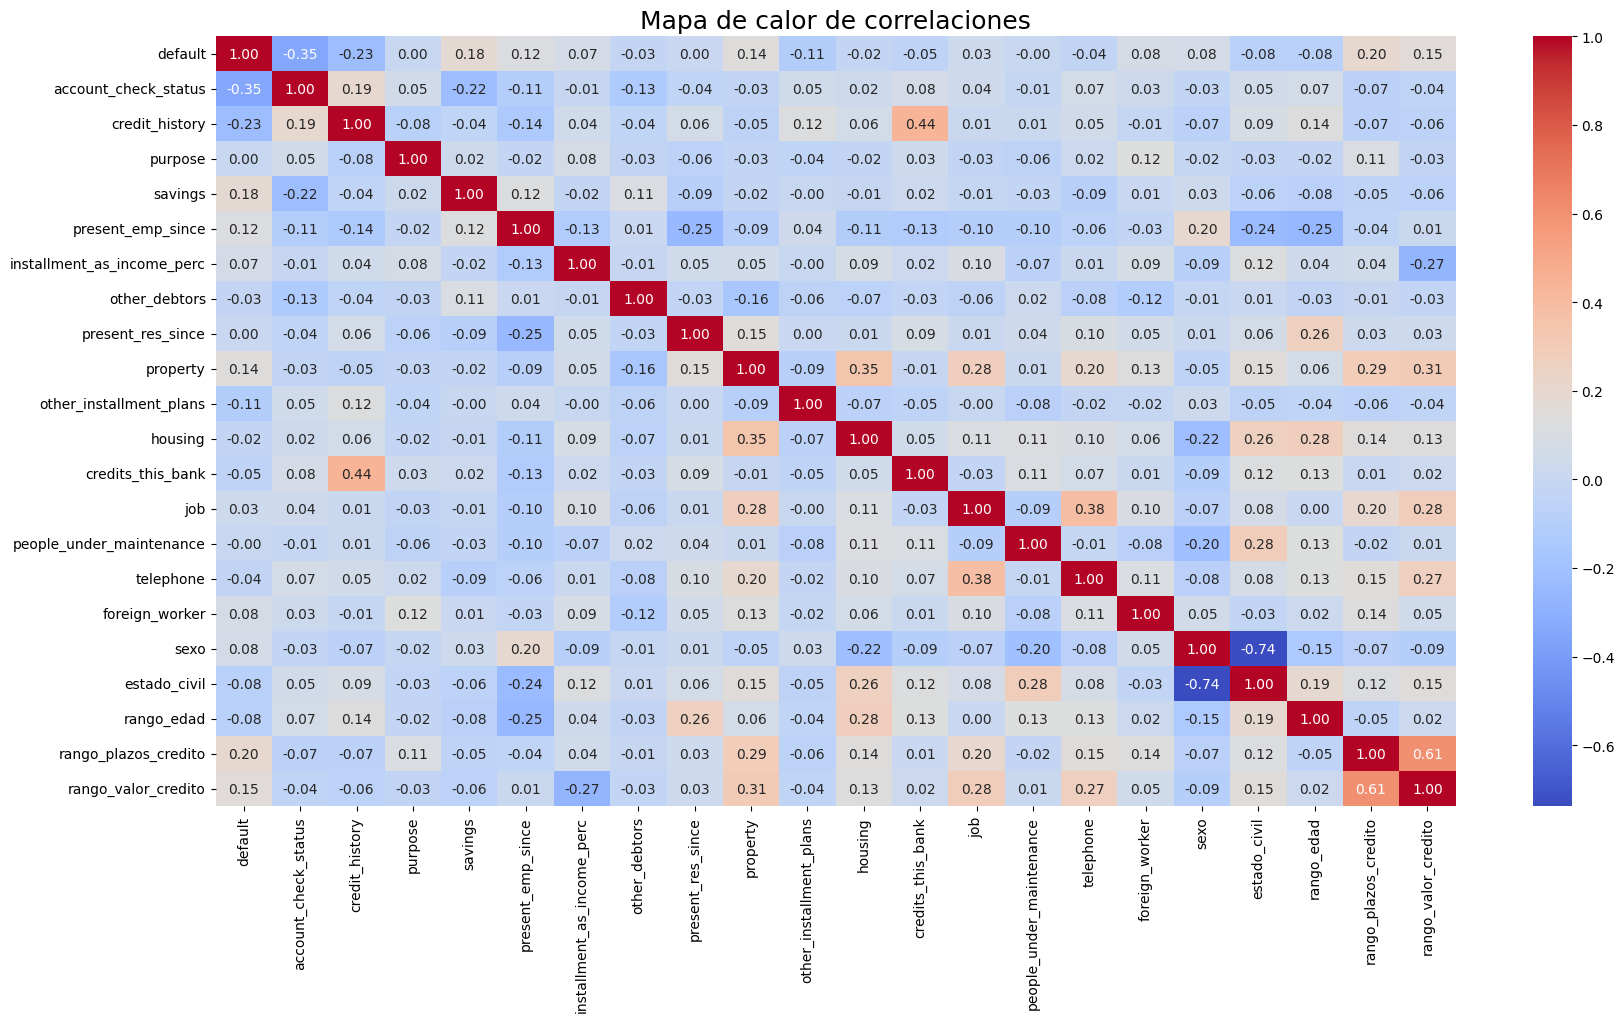

In [ ]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones",fontsize=18)
plt.show()

Respuesta 3:
- En la primera grafica observamos que hay mayor cantidad de hombres que realizan creditos que de mujeres.
- En la segunda grafica observamos que la mayor cantidad de creditos son de personas solteras.
- En la tercera grafica observamos que las personas prefieren hacer creditos a corto tiempo de 1 mes a 1 año.
- En la cuarta grafica observamos que las personas que hacen creditos son personas jovenes de rango de los 18 a 40 años de edad.
- En la quinta grafica observamos que el 70% de las personas que sacan creditos los pagan a tiempo.

## Clase 2: Construccion, evaluacion y seleccion del modelo

### Construccion del modelo
Experimentar con algunos algoritmos de machine learning como regresion logistica, arboles de decision, random forest, naive bayes, entre otros.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# prompt: ejemplo de modelo de machine learning de clasificacion

# # Importamos las librerías necesarias
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # preprocesamos los datos
# # se realizo en la clase 1

# # Dividimos los datos en entrenamiento y prueba
# X = df_banco.drop("default",axis=1)
# y = df_banco["default"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_stated=42)

# # Creamos el modelo de regresión logística
# modelo = LogisticRegression()

# # Entrenamos el modelo
# modelo.fit(X_train, y_train)

# # Realizamos predicciones
# predicciones = modelo.predict(X_test)

# # Evaluamos el modelo
# accuracy = accuracy_score(y_test, predicciones)
# print(f'La precisión del modelo es: {accuracy}')


In [ ]:
#@title
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [ ]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.7033333333333334
0.4805194805194805
0.43023255813953487
0.45398773006134974
0.6216583351445337


Random Forest
0.79
0.7254901960784313
0.43023255813953487
0.5401459854014599
0.7897196261682241


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




### Evaluacion y seleccion del modelo
Evaluar los modelos utilizando metricas como precision, recall, area bajo la curva ROC, y F1-Score para seleccionar el modelo con el mejor rendimiento para la prediccion de la solvencia crediticia.

In [ ]:
#@title
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6),  rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"{texto}"))

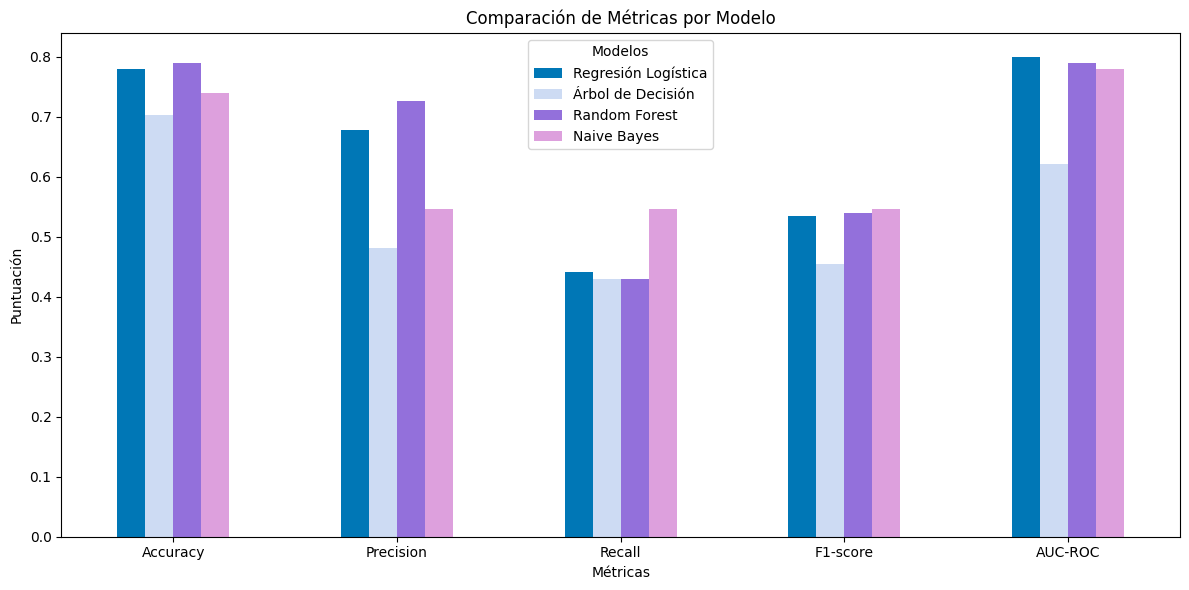

In [ ]:

visualiza_resultados()


¿Cuál de estos modelos seleccionarías y por qué?
Desafíos:

- Evaluar la Matrix de Confusión
- Balancear la variable target
- Seleccionar sólo algunas variable y reevaluar

In [ ]:
#@title
from sklearn.metrics import confusion_matrix
def crea_modelos_y_matrices():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}
  matrices_confusion = {}


  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)

      matriz_confusion = confusion_matrix(test_y, predictions)
      matrices_confusion[name] = matriz_confusion

      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

  # Muestra todas las matrices de confusión en una sola figura
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
  fig.suptitle('Matrices de Confusión para Modelos')

  for (name, matriz_confusion), ax in zip(matrices_confusion.items(), axes.flatten()):
      sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                  xticklabels=['Predicted 0', 'Predicted 1'],
                  yticklabels=['Actual 0', 'Actual 1'], ax=ax)
      ax.set_title(name)

  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el diseño para evitar superposiciones
  plt.show()

  return resultados


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


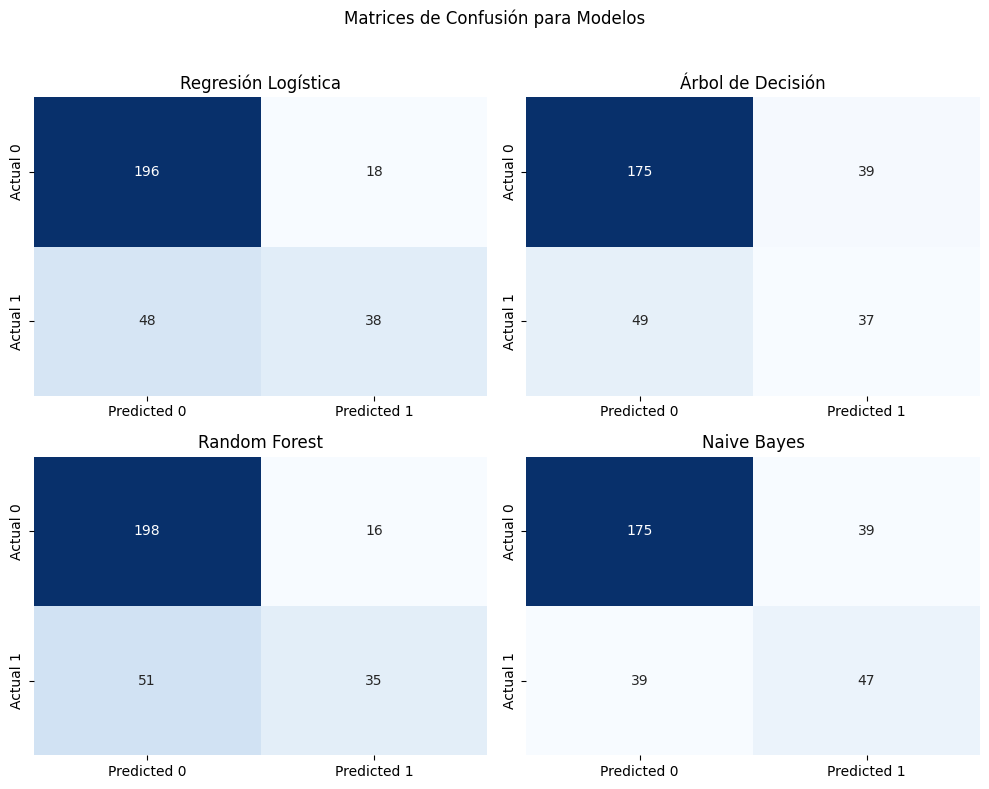


Evaluación para el modelo Regresión Logística:
Accuracy: 0.7800
Precisión: 0.6786
Recall: 0.4419
F1-Score: 0.5352
AUC-ROC: 0.7999

Evaluación para el modelo Árbol de Decisión:
Accuracy: 0.7067
Precisión: 0.4868
Recall: 0.4302
F1-Score: 0.4568
AUC-ROC: 0.6240

Evaluación para el modelo Random Forest:
Accuracy: 0.7767
Precisión: 0.6863
Recall: 0.4070
F1-Score: 0.5109
AUC-ROC: 0.7853

Evaluación para el modelo Naive Bayes:
Accuracy: 0.7400
Precisión: 0.5465
Recall: 0.5465
F1-Score: 0.5465
AUC-ROC: 0.7800


In [ ]:
resultados = crea_modelos_y_matrices()

for i in range(len(resultados['Model'])):
    model_name = resultados['Model'][i]
    accuracy = resultados['Accuracy'][i]
    precision = resultados['Precision'][i]
    recall = resultados['Recall'][i]
    f1 = resultados['F1-score'][i]
    auc_roc = resultados['AUC-ROC'][i]

    print(f"\nEvaluación para el modelo {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

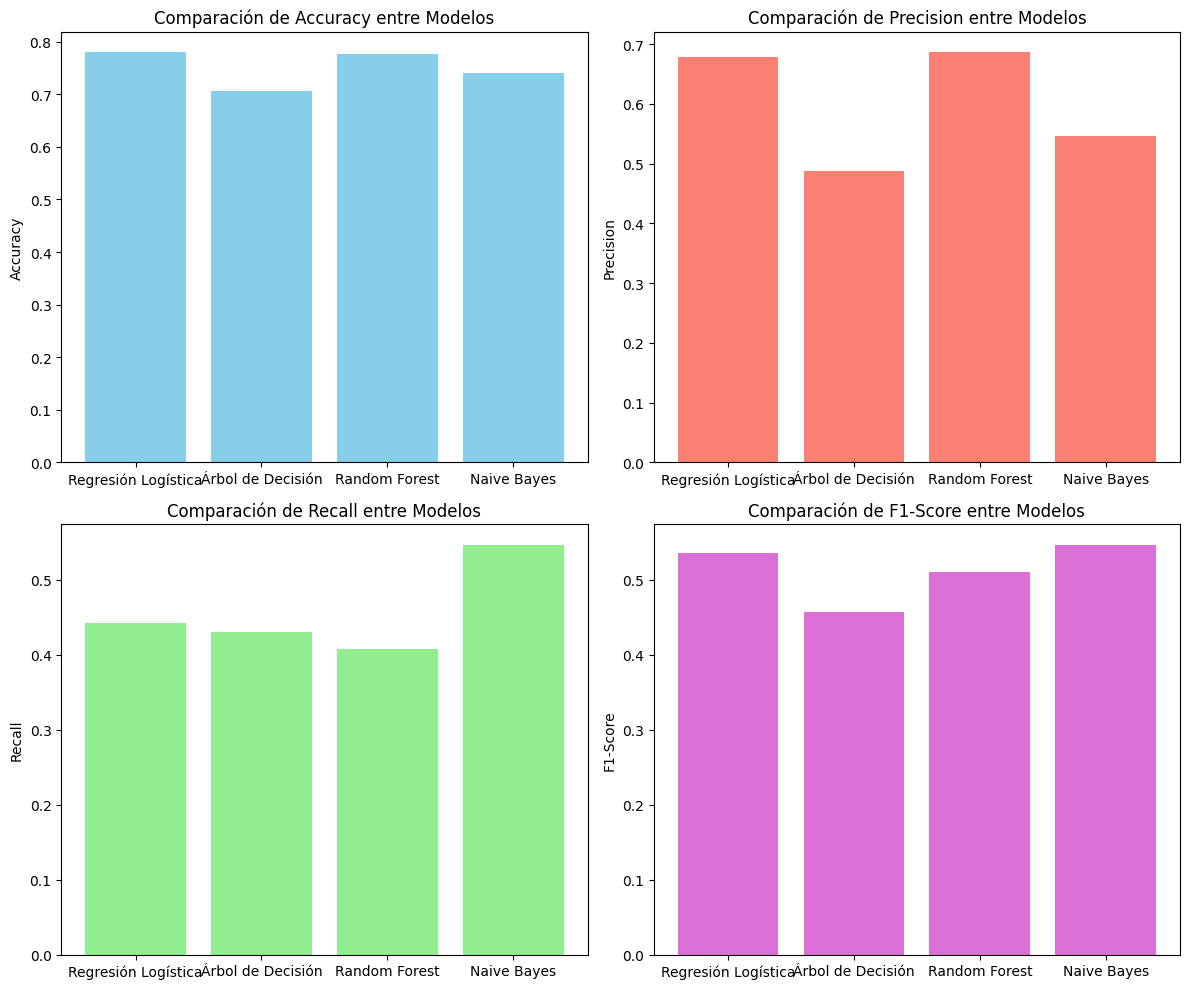

In [ ]:
# Utiliza los resultados obtenidos
model_names = resultados['Model']
accuracy_values = resultados['Accuracy']
precision_values = resultados['Precision']
recall_values = resultados['Recall']
f1_values = resultados['F1-score']
auc_roc_values = resultados['AUC-ROC']

# Crear subgráficos para cada métrica
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de Accuracy
axs[0, 0].bar(model_names, accuracy_values, color='skyblue')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Comparación de Accuracy entre Modelos')

# Gráfico de Precisión
axs[0, 1].bar(model_names, precision_values, color='salmon')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Comparación de Precision entre Modelos')

# Gráfico de Recall
axs[1, 0].bar(model_names, recall_values, color='lightgreen')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_title('Comparación de Recall entre Modelos')

# Gráfico de F1-Score
axs[1, 1].bar(model_names, f1_values, color='orchid')
axs[1, 1].set_ylabel('F1-Score')
axs[1, 1].set_title('Comparación de F1-Score entre Modelos')

# Ajustar el diseño
plt.tight_layout()
plt.show()

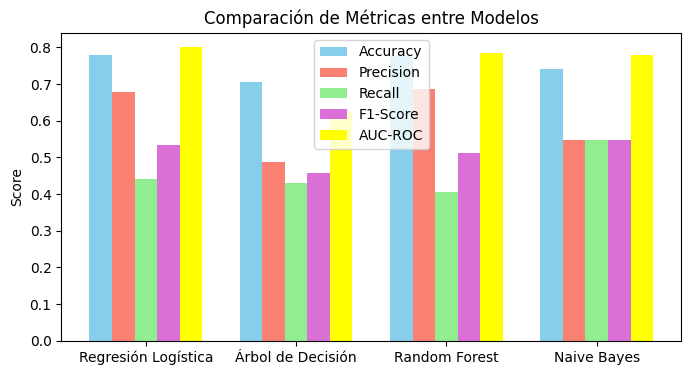

In [ ]:
import numpy as np
bar_width = 0.15
bar_positions = np.arange(len(model_names))

# Crear subgráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Graficar barras para cada métrica
ax.bar(bar_positions - 2 * bar_width, accuracy_values, width=bar_width, label='Accuracy', color='skyblue')
ax.bar(bar_positions - bar_width, precision_values, width=bar_width, label='Precision', color='salmon')
ax.bar(bar_positions, recall_values, width=bar_width, label='Recall', color='lightgreen')
ax.bar(bar_positions + bar_width, f1_values, width=bar_width, label='F1-Score', color='orchid')
ax.bar(bar_positions + 2 * bar_width, auc_roc_values, width=bar_width, label='AUC-ROC', color='yellow')

# Configuración del gráfico
ax.set_xticks(bar_positions)
ax.set_xticklabels(model_names)
ax.set_ylabel('Score')
ax.set_title('Comparación de Métricas entre Modelos')
ax.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
#@title

from imblearn.under_sampling import RandomUnderSampler

def crea_modelos_target_modificado():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  # Realizar submuestreo
  rus = RandomUnderSampler(random_state=77)
  train_x_resampled, train_y_resampled = rus.fit_resample(train_x, train_y)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x_resampled, train_y_resampled)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [ ]:
crea_modelos_target_modificado()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')


crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión Logística
0.7166666666666667
0.504
0.7325581395348837
0.5971563981042654
0.7887415779178439


Árbol de Decisión
0.6366666666666667
0.41605839416058393
0.6627906976744186
0.5112107623318386
0.6444794609867419


Random Forest
0.7133333333333334
0.5
0.7093023255813954
0.5865384615384616
0.8015105411866986


Naive Bayes
0.71
0.4961832061068702
0.7558139534883721
0.5990783410138248
0.7900999782655945




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.71
0.4935064935064935
0.4418604651162791
0.4662576687116564
0.6298087372310367


Random Forest
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.7765703108019996


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




Dice hacer oversampling